IRIS FLOWER CLASSIFICATION 

Task 3 : Problem Statement :-

1) The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements.Now imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

2) Use the Iris dataset to develop a model that can classify iris flowers into different speccies based on their and petal measurements. This dataset is widely used for introductory classification tasks.

Importing important libraries :

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

Reading the .csv data file :

In [173]:
Ir = pd.read_csv("Data/IRIS.csv")
Ir

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Exploring data :

In [174]:
Ir.info()
Ir.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [175]:
Ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Looking for no. of samples on each class :

In [176]:
Ir['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [177]:
#Looking for null values :
Ir.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Visualizing Data :

Plotting histograms :

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

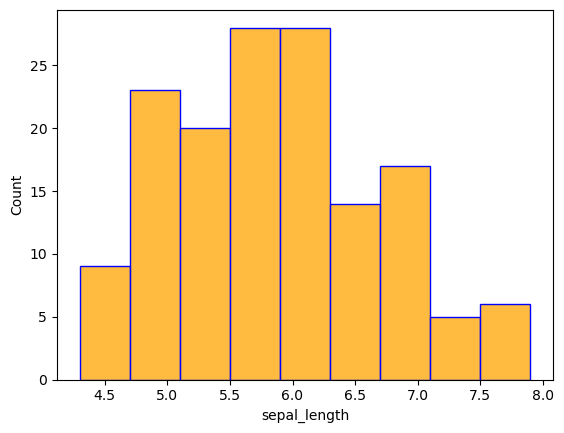

In [178]:
sns.histplot(Ir.sepal_length,color='orange',edgecolor='b')

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

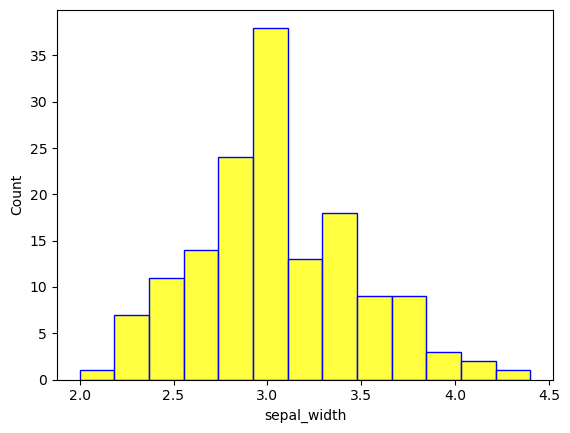

In [179]:
sns.histplot(Ir.sepal_width,color='yellow',edgecolor='b')

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

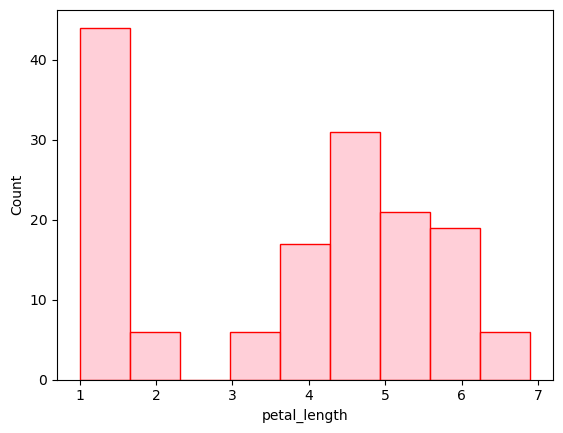

In [180]:
sns.histplot(Ir.petal_length,color='pink',edgecolor='r')

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

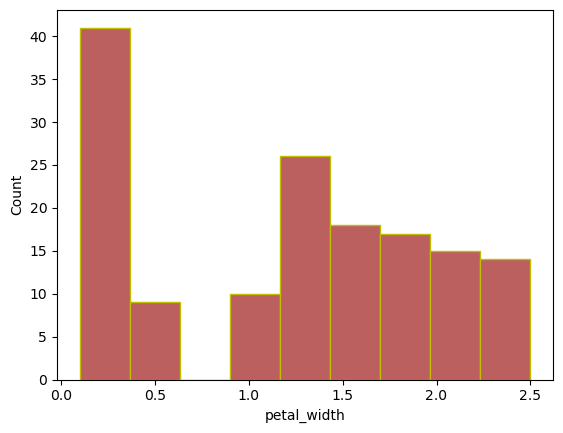

In [181]:
sns.histplot(Ir.petal_width,color='brown',edgecolor='y')

Scatterplot: 

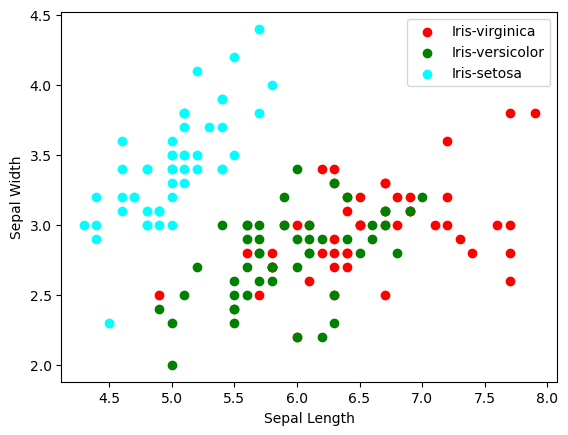

In [182]:
colors = ['red', 'green', 'cyan']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = Ir[Ir['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

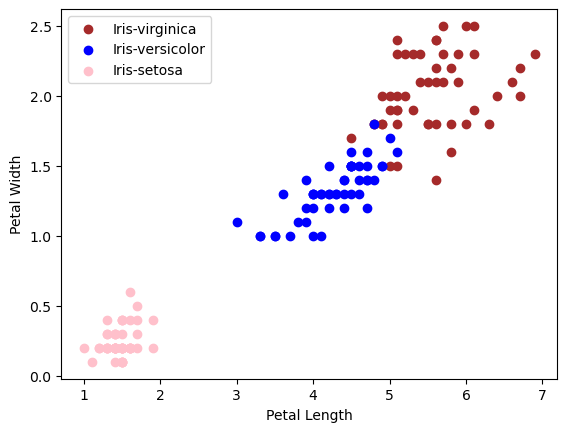

In [183]:
colors = ['brown', 'blue', 'pink']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = Ir[Ir['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

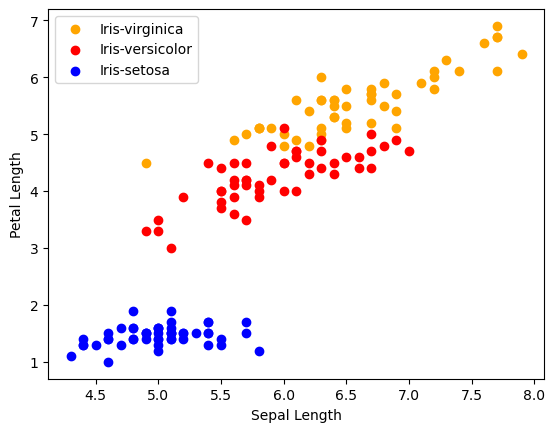

In [184]:
colors = ['orange', 'red', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = Ir[Ir['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

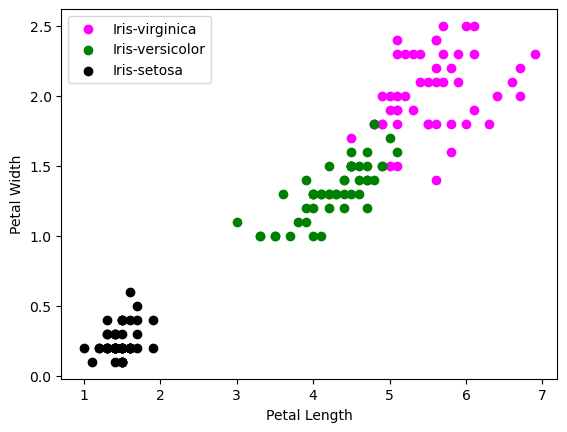

In [185]:
colors = ['magenta', 'green', 'black']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = Ir[Ir['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

Coorelation Matrix :

In [186]:
Ir.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

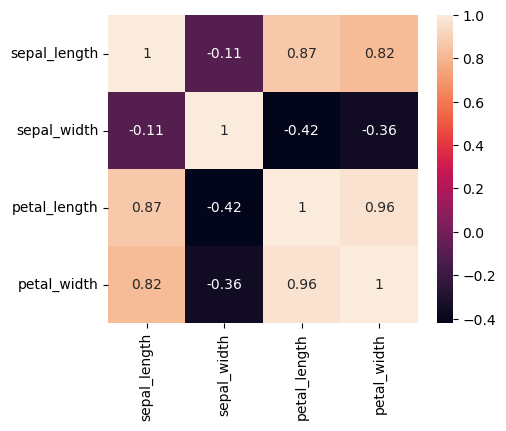

In [187]:
corr = Ir.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

Label Encoder

In [188]:
le = LabelEncoder()

In [189]:
Ir['species'] = le.fit_transform(Ir['species'])
Ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Separating our features and target columns for machine learning prediction :

In [190]:
X = Ir.drop(columns=['species'],axis=1)
Y = Ir['species']

Splitting the data into training data and test data :

In [191]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [192]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


Model training :

In [193]:
model = KNeighborsClassifier()

In [194]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.please try loading this page with nbviewer.org.

Accuracy Score for training data:

In [195]:
X_train_prediction= model.predict(X_train)

In [196]:
print(X_train_prediction)

[2 0 1 2 1 0 2 1 1 2 1 1 2 1 0 2 0 1 0 0 0 1 2 2 0 2 2 2 1 0 0 2 1 1 2 2 1
 0 1 0 2 1 1 0 1 1 1 2 0 1 0 1 2 0 1 0 0 0 2 2 0 0 2 2 1 2 1 1 2 0 2 2 2 0
 2 0 0 1 2 1 2 1 1 2 1 1 1 2 2 2 2 0 1 1 1 1 2 1 0 0 2 1 2 0 2 0 2 2 0 1 0
 2 1 0 2 1 0 0 2 0]


In [197]:
training_data_accuracy=accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data :{:.2f}%'.format(training_data_accuracy*100 ))

Accuracy score of training data :95.83%


Accuracy on test data :

In [198]:
X_test_prediction =model.predict(X_test)

In [199]:
print(X_test_prediction)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 1 1 2 1 1 0 0 2 0 2]


In [200]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of testing data :{:.2f}%'.format(testing_data_accuracy*100 ))

Accuracy score of testing data :100.00%


decision tree :

In [201]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.please try loading this page with nbviewer.org.

In [202]:
print("Accuracy: ",model.score(X_test, Y_test) * 100)

Accuracy:  93.33333333333333


Conclusion : 
The KNN algorithm is an effective classification method.It predicts the class label of new data point with full accuracy. This model is effective for given Iris classification dataset.